In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic_train = pd.read_csv("train.csv")

In [13]:
titanic_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,cabin_class
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton,NaN
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton,NaN
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton,C
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton,NaN


In [4]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
titanic_train = titanic_train.set_index("PassengerId")

In [6]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [7]:
titanic_train.describe(include='all')  # include = ['number', 'category', 'object']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Jarvis, Mr. John Denzil",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Categorical Variables

In [8]:
# Gender
titanic_train.Sex = pd.Categorical(titanic_train.Sex)  # titanic_train.Sex.astype('category')

In [9]:
# Embarked
titanic_train.Embarked

titanic_train.Embarked = pd.Categorical(titanic_train.Embarked)
titanic_train.Embarked = titanic_train.Embarked.cat.set_categories(['S', 'C', 'Q'], ordered=True)
titanic_train.Embarked = titanic_train.Embarked.cat.rename_categories({'C': 'Cherbourg', 'Q': 'Queensland', 'S': 'Southampton'})

titanic_train.Embarked

PassengerId
1      Southampton
2        Cherbourg
3      Southampton
4      Southampton
5      Southampton
6       Queensland
7      Southampton
8      Southampton
9      Southampton
10       Cherbourg
11     Southampton
12     Southampton
13     Southampton
14     Southampton
15     Southampton
16     Southampton
17      Queensland
18     Southampton
19     Southampton
20       Cherbourg
21     Southampton
22     Southampton
23      Queensland
24     Southampton
25     Southampton
26     Southampton
27       Cherbourg
28     Southampton
29      Queensland
30     Southampton
          ...     
862    Southampton
863    Southampton
864    Southampton
865    Southampton
866    Southampton
867      Cherbourg
868    Southampton
869    Southampton
870    Southampton
871    Southampton
872    Southampton
873    Southampton
874    Southampton
875      Cherbourg
876      Cherbourg
877    Southampton
878    Southampton
879    Southampton
880      Cherbourg
881    Southampton
882    Southampton


In [10]:
# Priority Class
titanic_train.Pclass = pd.Categorical(titanic_train.Pclass)

In [11]:
# Survival
titanic_train.Survived = pd.Categorical(titanic_train.Survived)

In [12]:
# Cabin -- Getting the first character
cabin_class = [cabin[0] if cabin is not np.NaN else np.NaN for cabin in titanic_train.Cabin]

# Cabin Class
titanic_train['cabin_class'] = pd.Categorical(cabin_class)
titanic_train.cabin_class

PassengerId
1      NaN
2        C
3      NaN
4        C
5      NaN
6      NaN
7        E
8      NaN
9      NaN
10     NaN
11       G
12       C
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22       D
23     NaN
24       A
25     NaN
26     NaN
27     NaN
28       C
29     NaN
30     NaN
      ... 
862    NaN
863      D
864    NaN
865    NaN
866    NaN
867    NaN
868      A
869    NaN
870    NaN
871    NaN
872      D
873      B
874    NaN
875    NaN
876    NaN
877    NaN
878    NaN
879    NaN
880      C
881    NaN
882    NaN
883    NaN
884    NaN
885    NaN
886    NaN
887    NaN
888      B
889    NaN
890      C
891    NaN
Name: cabin_class, Length: 891, dtype: category
Categories (8, object): [A, B, C, D, E, F, G, T]

In [379]:
def cat_summary(df, cols):
    for col in cols:
        print(df[col].value_counts(sort=False, dropna=False) , "\n")     

In [380]:
cat_summary(titanic_train, ['Sex','Embarked','Pclass', 'Survived','cabin_class'])

female    314
male      577
Name: Sex, dtype: int64 

Southampton    644
Cherbourg      168
Queensland      77
NaN              2
Name: Embarked, dtype: int64 

1    216
2    184
3    491
Name: Pclass, dtype: int64 

0    549
1    342
Name: Survived, dtype: int64 

A       15
B       47
C       59
D       33
E       32
F       13
G        4
T        1
NaN    687
Name: cabin_class, dtype: int64 



## Continuous Variables

In [394]:
titanic_train.describe(include='number')

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


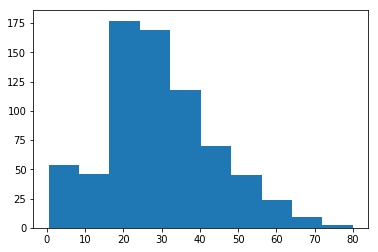

In [383]:
plt.hist(titanic_train.Age.dropna())
plt.show()

In [398]:
# Age has missing values
sum(titanic_train.Age.isna())

177

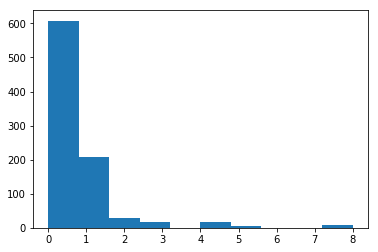

In [403]:
plt.hist(titanic_train.SibSp)
plt.show()

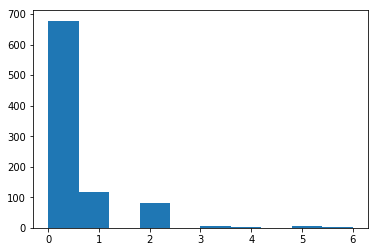

In [404]:
plt.hist(titanic_train.Parch)
plt.show()

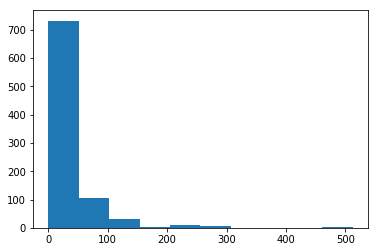

In [402]:
plt.hist(titanic_train.Fare)
plt.show()

## Two-way cross-table

In [423]:
# Did fewer females survived 

print(pd.crosstab(titanic_train.Survived, titanic_train.Sex, dropna = False))

# Getting the percentages.
np.round((pd.crosstab(titanic_train.Survived, titanic_train.Sex, dropna = False)/len(titanic_train)) * 100, 2)


Sex       female  male
Survived              
0             81   468
1            233   109


Sex,female,male
Survived,,
0,9.09,52.53
1,26.15,12.23


In [ ]:
pd.crosstab(titanic_train.Survived, titanic_train.Sex, dropna = False)

In [ ]:
pd.crosstab(titanic_train.Survived, titanic_train.Sex, dropna = False)

## Missing Value Imputation

In [413]:
len(titanic_train)

891